# Urban vs Rural Areas... Hidden trends for People vs Education vs Age

- The Datasets used in this notebook about United States Cities Database comes from [SimpleMaps](https://simplemaps.com/data/us-cities) (for Cities, population) and a made up dataset found in CodeAcademy about users/age/education. 
- The goal it's to practice a little python and visualizations, together with trasnforming the dataset and discovering made-up hidden trends.  

# Determine the Necessary Data

In [45]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Importing Code Academy dataset
df = pd.read_csv("Datasets/user_data.csv")

In [29]:
# Snapshot of the dataframe 
df.head()

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21


In [30]:
# Understagin the df
df.describe()

,age
count,201.000000
mean,29.427861
std,5.174555
min,21.000000
25%,25.000000
50%,30.000000
75%,34.000000
max,45.000000


In [31]:
# Asigning the mean of age to a new variable 
population_mean = np.mean(df["age"])
population_mean

29.427860696517413

In [33]:
# Selecting samples of age and calculating the mean of those samples
extra_small_sample = df["age"][:10]
small_sample = df["age"][:50]
medium_sample = df["age"][:100]
large_sample = df["age"][:200]

extra_small_sample_mean = np.mean(extra_small_sample)
small_sample_mean = np.mean(small_sample)
medium_sample_mean = np.mean(medium_sample)
large_sample_mean = np.mean(large_sample)

print ("Extra small sample mean is: " + str(extra_small_sample_mean))
print("Small sample mean is: " + str(small_sample_mean))
print("Medium sample mean is: " + str(medium_sample_mean))
print("Large sample mean is: " + str(large_sample_mean))

print ("\nPopulation Mean is: " + str(population_mean))

Extra small sample mean is: 29.0
Small sample mean is: 29.24
Medium sample mean is: 29.04
Large sample mean is: 29.35

Population Mean is: 29.427860696517413


# Working with SimpleMaps dataset

# Cleaning the Data

In [34]:
# Importing the dataset
pop_data = pd.read_csv("Datasets/us_cities_small.csv")
pop_data.head()

,city,population_proper
0,"Prairie Ridge, WA",NaN
1,"Edison, WA",NaN
2,"Packwood, WA",NaN
3,"Wautauga Beach, WA",NaN
4,"Harper, WA",NaN


In [36]:
# Looking again the current user DataFrame
df.head()

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21


In [38]:
# Merging the two datasets on the city
new_df = pd.merge(df, pop_data)
new_df.head(10)

,city,education,age,population_proper
0,"Brooklyn, NY",college,31,2629150.0
1,"Brooklyn, NY",graduate degree,31,2629150.0
2,"Brooklyn, NY",graduate degree,32,2629150.0
3,"Brooklyn, NY",college,37,2629150.0
4,"Brooklyn, NY",college,21,2629150.0
5,"Austin, TX",college,25,947890.0
6,"Austin, TX",graduate degree,22,947890.0
7,"Oakland, CA",graduate degree,29,420005.0
8,"Pittsburgh, PA",college,29,303625.0
9,"Pittsburgh, PA",college,27,303625.0


In [41]:
# Cathegorizing the area in urban or rural, based on population 
#  In US, the cut for population to consider an area classification varies with time and influenced by other factors,
# for this reason, I'm leacing the variable alone in case there's a change of updating it afterwards 
# and for this excercise's purpose, I'm setting it to a number that I'm currently seing in the Bureau. 
# More info in https://www.hhs.gov/guidance/document/defining-rural-population

classification_cut = 50000

new_df.loc[new_df.population_proper < classification_cut, "location"] = "rural"
new_df.loc[new_df.population_proper >= classification_cut, "location"] = "urban"

# look at the new DataFrame:
new_df.head(20)

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban
5,"Austin, TX",college,25,947890.0,urban
6,"Austin, TX",graduate degree,22,947890.0,urban
7,"Oakland, CA",graduate degree,29,420005.0,urban
8,"Pittsburgh, PA",college,29,303625.0,urban
9,"Pittsburgh, PA",college,27,303625.0,urban


# Exploring

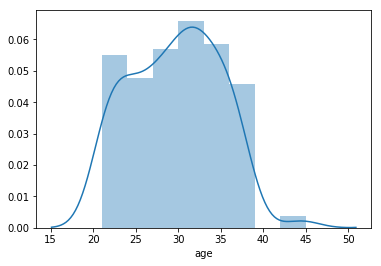

In [46]:
# Histogram to see the distribution of age
age = new_df["age"]
sns.distplot(age)
plt.show()

In [48]:
# Mean age of urban and rural areas
location_mean_age = new_df.groupby('location').age.mean() # turns it into a series
location_mean_age.head()

location
rural    31.000000
urban    29.661111
Name: age, dtype: float64